<a href="https://colab.research.google.com/github/Tylerkou/Toronto-Parking-Tickets-Infraction-Analysis/blob/main/BTE_HLF_MEG__Stock_Finance_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project 

In this project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

In [68]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
#%matplotlib inline


## Import Data

Get the stock data from any day, Set each data to be a separate dataframe, get each variable name of ticker symbol.

Use datetime to set start and end datetime objects.
Figure out how to use datareader to grab info on the stock.

In [72]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2021, 6, 18)

In [73]:
# Baytex Energy Corp
BTE = data.DataReader("BTE.TO", 'yahoo', start, end)

# High Liner Foods
HLF = data.DataReader("HLF.TO", 'yahoo', start, end)

# Meg Energy corp
MEG = data.DataReader("MEG.TO", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [74]:
HLF.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-14,13.47,13.34,13.43,13.34,27000.0,13.34
2021-06-15,13.44,13.31,13.33,13.34,6300.0,13.34
2021-06-16,13.33,13.25,13.32,13.30,71400.0,13.30
2021-06-17,13.32,13.05,13.25,13.28,49800.0,13.28
2021-06-18,13.35,13.16,13.21,13.27,120867.0,13.27


In [75]:

df = data.DataReader(['BTE', 'HLF', 'MEG', 'JPM', 'MS','WFC'],'yahoo', start, end)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BTE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [76]:
df.tail(3)

Attributes  Adj Close                         ...      Volume                
Symbols           HLF        MEG         JPM  ...          MS         WFC BTE
Date                                          ...                            
2021-06-16  52.290001  49.540001  156.270004  ...  11369900.0  38256700.0 NaN
2021-06-17  51.369999  49.939999  151.759995  ...  11124200.0  48878800.0 NaN
2021-06-18  50.790001  49.669998  147.919998  ...  21839037.0  45181470.0 NaN

[3 rows x 36 columns]

In [ ]:
tickers = ['BTE', 'HLF', 'MEG','JPM', 'MS','WFC' ]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. # You can add more stock ticker, but you need to update data from above individual ticker**

In [79]:
bank_stocks = pd.concat([BTE, HLF, MEG,JPM, MS,WFC],axis=1,keys=tickers) 

** Set the column name levels (this is filled out for you):**

In [80]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [81]:
bank_stocks.tail()

Bank Ticker   BTE              ...        WFC                       
Stock Info   High   Low  Open  ...      Close      Volume  Adj Close
Date                           ...                                  
2021-06-14   2.27  2.20  2.21  ...  45.150002  25452300.0  45.150002
2021-06-15   2.28  2.23  2.26  ...  45.459999  23865400.0  45.459999
2021-06-16   2.25  2.20  2.24  ...  45.570000  38256700.0  45.570000
2021-06-17   2.23  2.06  2.22  ...  42.790001  48878800.0  42.790001
2021-06-18   2.23  2.08  2.09  ...  41.750000  45181470.0  41.750000

[5 rows x 36 columns]

In [82]:
bank_stocks

Bank Ticker        BTE                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   17.900000  17.650000  17.700001  ...  31.900000  11016400.0  20.613142
2006-01-04   17.900000  17.350000  17.700001  ...  31.530001  10870000.0  20.374050
2006-01-05   17.799999  17.469999  17.650000  ...  31.495001  10158000.0  20.351437
2006-01-06   18.020000  17.610001  17.610001  ...  31.680000   8403800.0  20.470978
2006-01-09   18.100000  17.799999  18.000000  ...  31.674999   5619600.0  20.467749
...                ...        ...        ...  ...        ...         ...        ...
2021-06-14    2.270000   2.200000   2.210000  ...  45.150002  25452300.0  45.150002
2021-06-15    2.280000   2.230000   2.260000  ...  45.459999  23865400.0  45.459999
2021-06-16    2.250000   2.200000   2.240000  ...  45.570000  38256700.0  45.570000
2021-06-17    2.230000   2.060000   2.220000  ...  42.790001  48878800.0  42.790001
2021-06-18    2.230000   2.080000   2.090000  ...  41.750000  45181470.0  41.750000

[3961 rows x 36 columns]

# Stock Analysis

[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


##  Stock Max price in the period

In [84]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BTE     58.869999
HLF     27.219999
MEG     52.680000
JPM    166.440002
MS      93.959999
WFC     65.930000
dtype: float64

##Returns Formuler

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [86]:
returns = pd.DataFrame()

In [87]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.tail()

,BTE Return,HLF Return,MEG Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2021-06-14,0.022936,-0.001497,-0.009091,-0.016969,-0.014449,-0.011602
2021-06-15,0.004484,0.000000,0.056193,-0.015168,-0.000221,0.006866
2021-06-16,-0.004464,-0.002998,-0.019544,0.007024,0.004410,0.002420
2021-06-17,-0.058296,-0.001504,-0.044297,-0.028860,-0.035016,-0.061005
2021-06-18,0.042857,-0.000753,0.002317,-0.025303,-0.043454,-0.024305


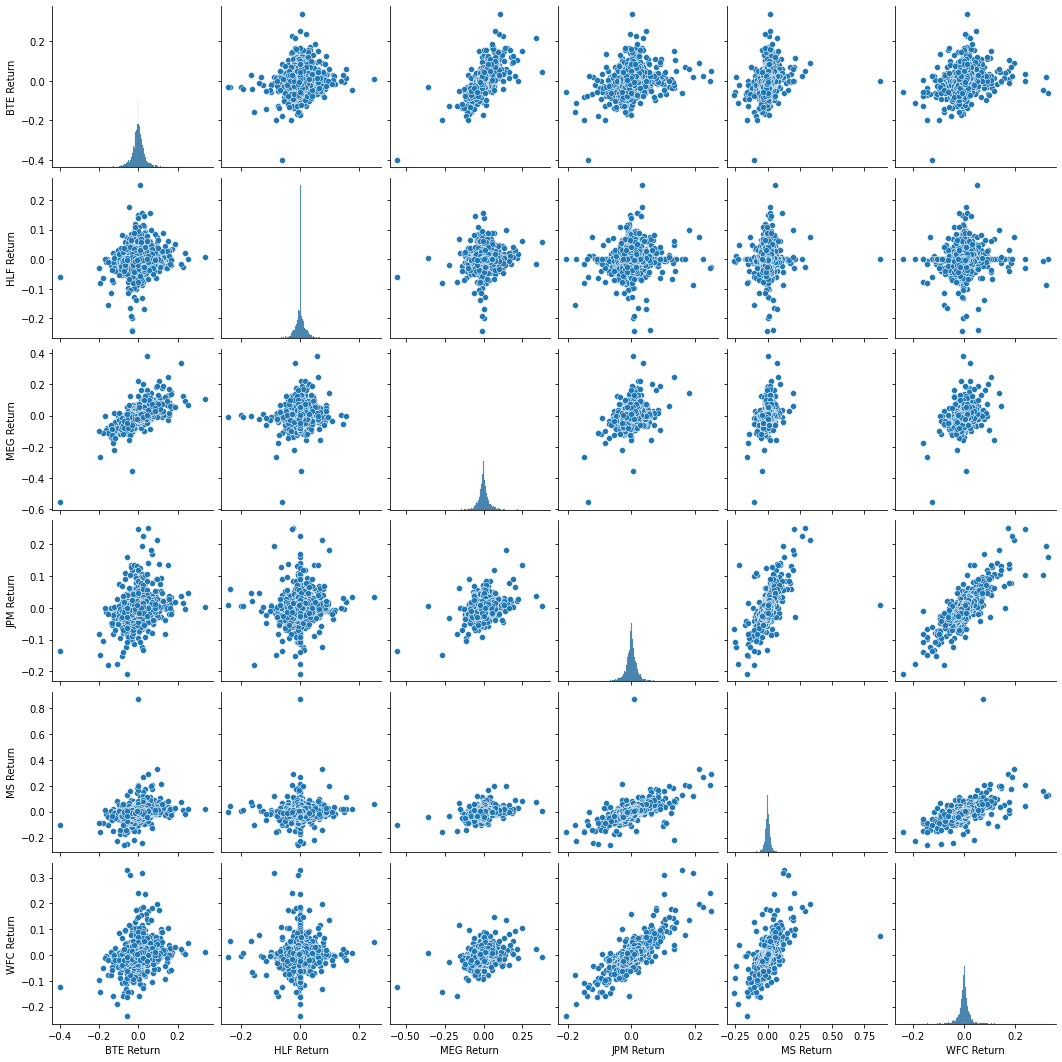

In [88]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

How to use this plot:
Check how each stock related with each other
from this plot can see Beta, risk of again standard

In [89]:
# Worst Drop 01-20 is the  Inauguration day, not sure  the  other two days yet. I will analysis in the future with news API)
returns.idxmin()

BTE Return   2020-03-09
HLF Return   2018-11-08
MEG Return   2020-03-09
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [92]:
# Best Single Day Gain

returns.idxmax()

BTE Return   2020-06-02
HLF Return   2007-08-17
MEG Return   2018-10-01
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [94]:
returns.std()

BTE Return    0.035777
HLF Return    0.023895
MEG Return    0.039681
JPM Return    0.024702
MS Return     0.032726
WFC Return    0.027138
dtype: float64

In [95]:
returns['2020-01-01':'2020-12-31'].std() # MEG is the winner

BTE Return    0.068837
HLF Return    0.030044
MEG Return    0.071308
JPM Return    0.034004
MS Return     0.035881
WFC Return    0.038271
dtype: float64

In [96]:
returns

,BTE Return,HLF Return,MEG Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.009045,0.000000,NaN,-0.014183,0.000686,-0.011599
2006-01-05,-0.020728,-0.015957,NaN,0.003029,0.002742,-0.001110
2006-01-06,0.027460,-0.016216,NaN,0.007046,0.001025,0.005874
2006-01-09,-0.008909,-0.010989,NaN,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2021-06-14,0.022936,-0.001497,-0.009091,-0.016969,-0.014449,-0.011602
2021-06-15,0.004484,0.000000,0.056193,-0.015168,-0.000221,0.006866
2021-06-16,-0.004464,-0.002998,-0.019544,0.007024,0.004410,0.002420


## Create a distplot using seaborn 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


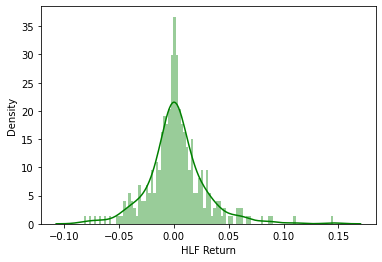

In [98]:
sns.distplot(returns['2020-03-15':'2021-6-18']['HLF Return'],color='green',bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


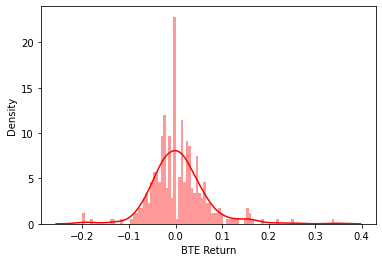

In [99]:
sns.distplot(returns['2020-03-15':'2021-6-18']['BTE Return'],color='red',bins=100)

____
## More Visualization



In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price  

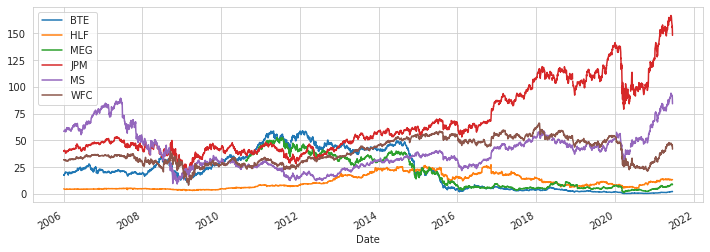

In [101]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

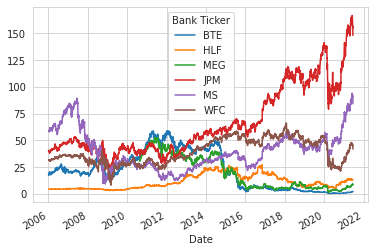

In [102]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [105]:
BTE['Close']['2021-01-01':'2021-01-31']

Date
2021-01-04    0.74
2021-01-05    0.86
2021-01-06    0.86
2021-01-07    0.88
2021-01-08    0.88
2021-01-11    0.85
2021-01-12    0.91
2021-01-13    0.88
2021-01-14    0.91
2021-01-15    0.87
2021-01-18    0.85
2021-01-19    0.87
2021-01-20    0.90
2021-01-21    0.87
2021-01-22    0.88
2021-01-25    0.86
2021-01-26    0.83
2021-01-27    0.81
2021-01-28    0.79
2021-01-29    0.76
Name: Close, dtype: float64

In [107]:
BTE['Close']['2021-06-01':'2021-06-18']

Date
2021-06-01    2.17
2021-06-02    2.04
2021-06-03    2.03
2021-06-04    2.08
2021-06-07    2.05
2021-06-08    2.07
2021-06-09    2.13
2021-06-10    2.15
2021-06-11    2.18
2021-06-14    2.23
2021-06-15    2.24
2021-06-16    2.23
2021-06-17    2.10
2021-06-18    2.19
Name: Close, dtype: float64

## Moving Averages



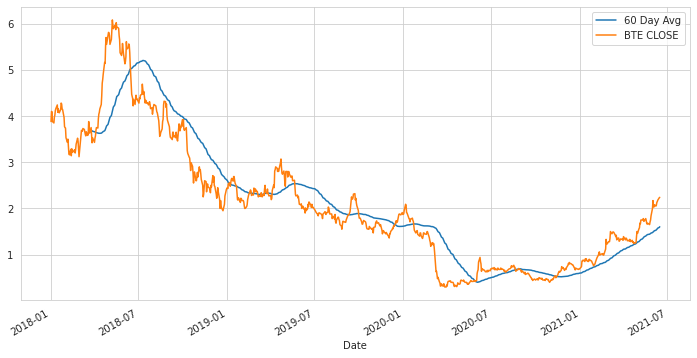

In [109]:
plt.figure(figsize=(12,6))
BTE['Close']['2018-01-01':'2021-06-15'].rolling(window=60).mean().plot(label='60 Day Avg')
BTE['Close']['2018-01-01':'2021-06-15'].plot(label='BTE CLOSE')
plt.legend()

## Create a heatmap of the correlation between the stocks Close Price.

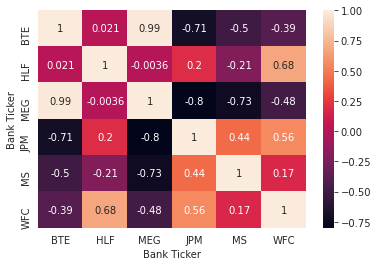

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

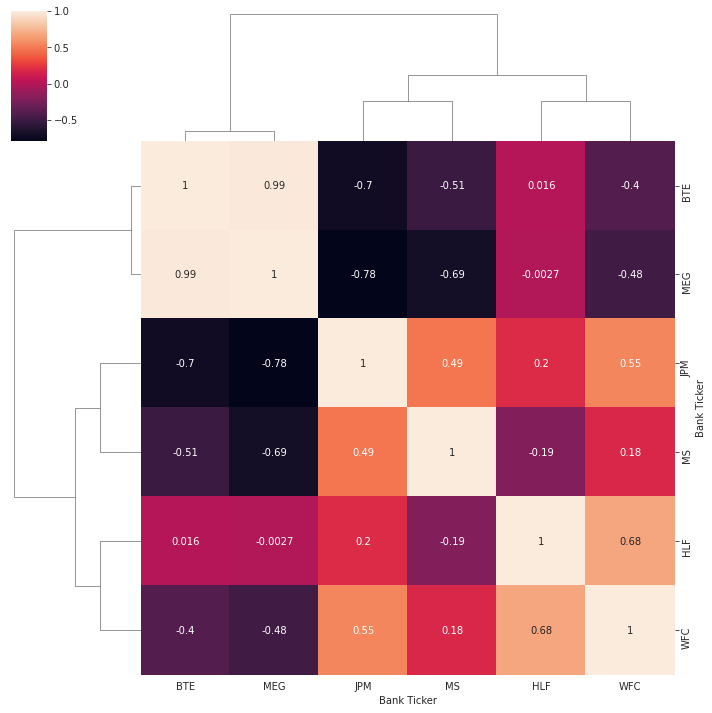

In [110]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [ ]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

## Use .iplot(kind='candle) to create a candle plot 

In [111]:
from plotly.offline import init_notebook_mode, iplot

import pandas as pd

import plotly as py
import time
import copy
# from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.figure_factory as ff
from collections import defaultdict
from IPython.display import display,Image


# #fig = go.Figure(data=[go.Candlestick(data_sec)])

# fig = go.Figure(data=[go.Candlestick(x=data_sec.index,
#                        open=data_sec['Open'], high=data_sec['High'],
#                        low=data_sec['Low'], close=data_sec['Close'])])
# fig.show
!pip install mplfinance
import mplfinance as mpf


#df = yfinance.download('AAPL')

# fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']])
# fplt.show()


     |████████████████████████████████| 71kB 4.1MB/s 


In [112]:
!pip install yfinance
import yfinance


     |████████████████████████████████| 6.3MB 7.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=22a9d6e9e23b8a4653d95133a0c0dcdbfa182540db124e6100952e2e20de0ba0
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

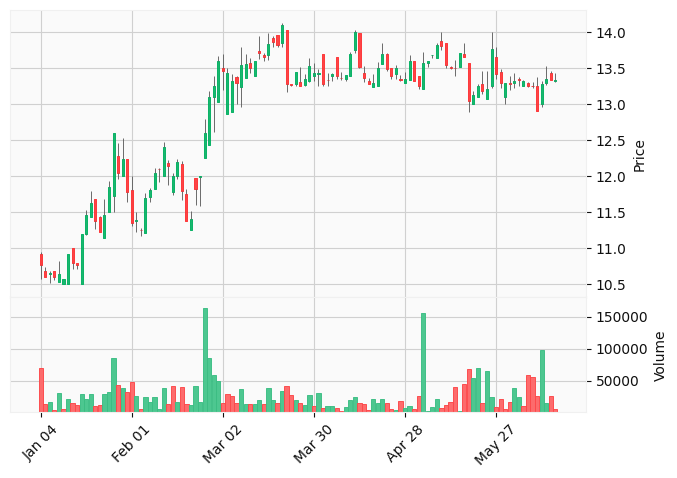

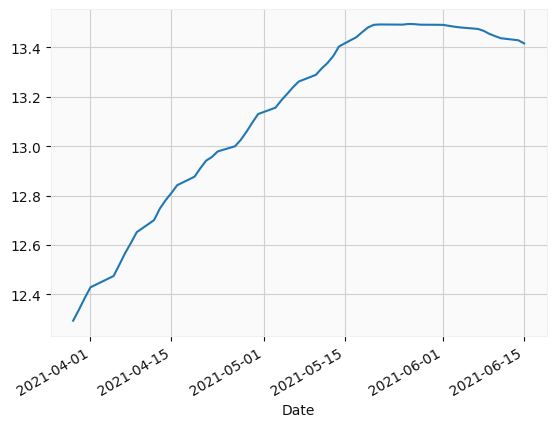

In [116]:

df = yfinance.download('HLF.TO')['2021-01-01':'2021-06-15']
plt.figure(figsize=(12,6))
mpf.plot(df, type='candle', style='yahoo', volume=True)
df['Close']['2021-01-01':'2021-06-15'].rolling(window=60).mean().plot(label='60 Day Avg')

In [117]:
# First we set the kwargs that we will use for the style examples:
renko_kwargs = dict(type='renko',mav=(8,20,30), volume=True,figratio=(12,8),figscale=0.75)
pnf_kwargs = dict(type='pnf',mav=(4,6,8), volume=True,figratio=(12,8),figscale=0.75)

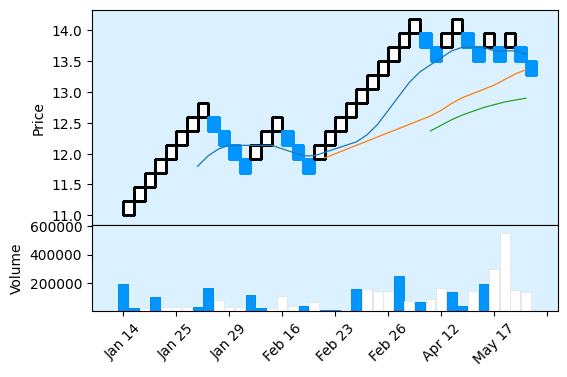

In [118]:
mpf.plot(df,**renko_kwargs,style='blueskies')

https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb

In [119]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import pandas as pd

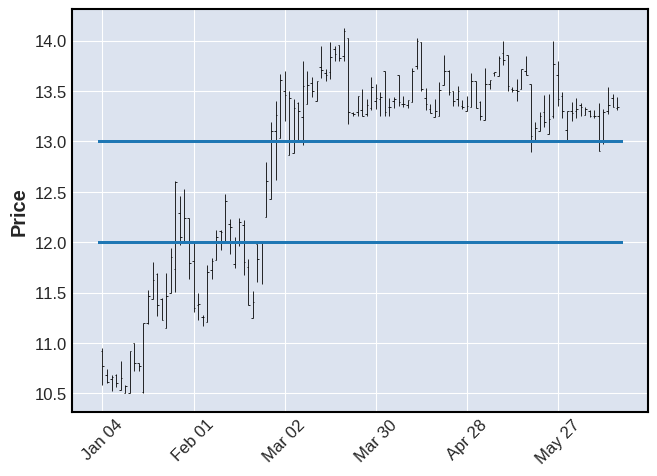

In [120]:
mpf.plot(df,hlines=[12,13])

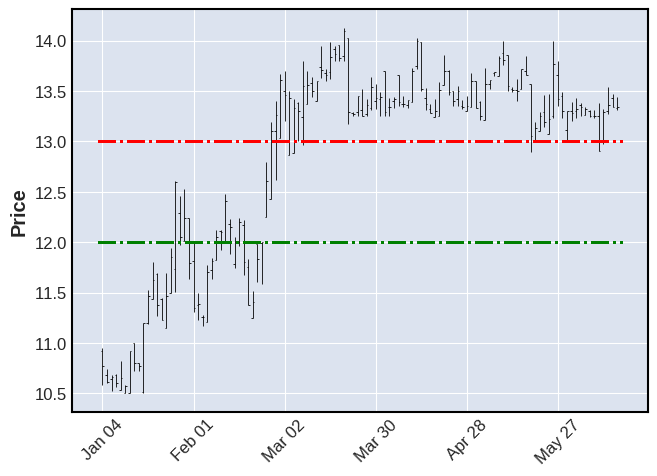

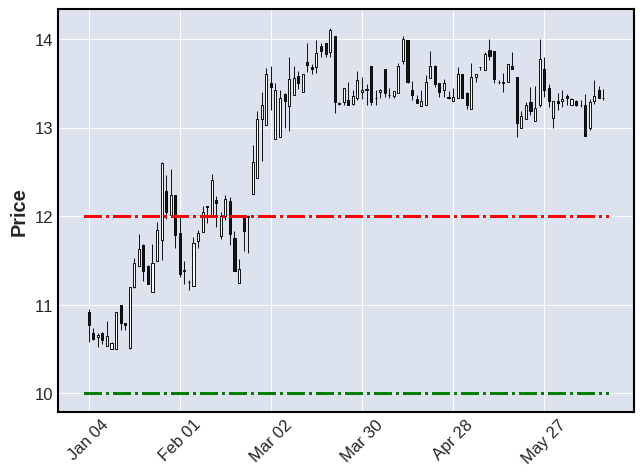

In [123]:
mpf.plot(df,hlines=dict(hlines=[12,13],colors=['g','r'],linestyle='-.'))
mpf.plot(df,hlines=dict(hlines=[10,12],colors=['g','r'],linestyle='-.'),type='candle')

In [131]:

data_sec=BTE[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2021-04-15']
df=data_sec
import yfinance # need volume, set df=data_sec
#mpf.plot(df, type='candle', style='yahoo', volume=True)

In [132]:
data_sec.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
      

In [ ]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [ ]:
BTE['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')